In [27]:
import numpy as np
import matplotlib.pyplot as plt
import random
from random import sample
import sklearn
from sklearn.decomposition import PCA

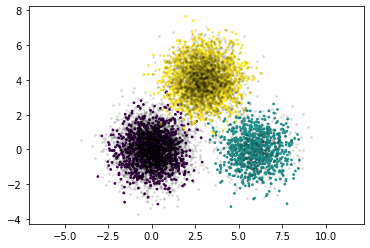

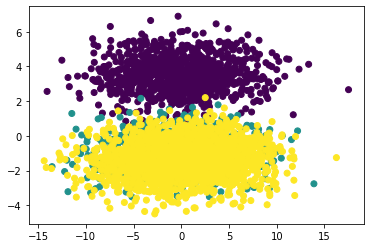

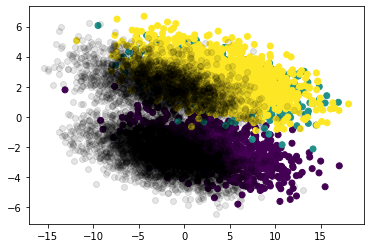

In [110]:
configuration = '3sticks'
#configuration = 'stick_between_sheets'
#configuration = '2sticks_sheet'

if configuration=='3sticks':
    n_points = [1000,800,2000]
    n_pointsY = [4000,500,2000]
    mean1 = np.array([0,0,0,0])
    cov1 = np.array([[1,0,0,0],[0,1,0,0],[0,0,20,0],[0,0,0,1]])
    mean2 = np.array([6,0,0,0])
    cov2 = np.array([[1,0,0,0],[0,1,0,0],[0,0,20,0],[0,0,0,1]])
    mean3 = np.array([3,4,0,0])
    cov3 = np.array([[1,0,0,0],[0,1,0,0],[0,0,20,0],[0,0,0,1]])

if configuration=='2sticks_sheet':
    n_points = [1000,1000,3000]
    n_pointsY = [1000,1000,1000]
    mean1 = np.array([0,0,0,0])
    cov1 = np.array([[1,0,0,0],[0,1,0,0],[0,0,8,0],[0,0,0,1]])
    mean2 = np.array([6,0,0,0])
    cov2 = np.array([[1,0,0,0],[0,1,0,0],[0,0,8,0],[0,0,0,1]])
    mean3 = np.array([3,4,0,0])
    cov3 = np.array([[10,0,0,0],[0,1.1,0,0],[0,0,8,0],[0,0,0,1]])

if configuration=='stick_between_sheets':
    n_points = [1000,1000,1000]
    n_pointsY = [1000,1000,1000]
    mean1 = np.array([-3,1,0,0])
    cov1 = np.array([[1,0,0,0],[0,1,0,0],[0,0,8,0],[0,0,0,1]])
    mean2 = np.array([5,0,0,0])
    cov2 = np.array([[10,4,0,0],[0,1,0,0],[0,0,8,0],[0,0,0,1]])
    mean3 = np.array([1,5,0,0])
    cov3 = np.array([[10,0,0,0],[0,1,0,0],[0,0,8,0],[0,0,0,1]])
    
XX1 = np.random.multivariate_normal(mean1, cov1, size=10000)
XX2 = np.random.multivariate_normal(mean2, cov2, size=10000)
XX3 = np.random.multivariate_normal(mean3, cov3, size=10000)
X1 = XX1[sample(range(10000),n_points[0]),:]
X2 = XX2[sample(range(10000),n_points[1]),:]
X3 = XX3[sample(range(10000),n_points[2]),:]
# sample Y with shift in 'non-relevant' direction
shift = [0,0,-5,4]
Y1 = XX1[sample(range(10000),n_pointsY[0]),:]+shift
Y2 = XX2[sample(range(10000),n_pointsY[1]),:]+shift
Y3 = XX3[sample(range(10000),n_pointsY[2]),:]+shift
# even more, distort Y1,Y2,Y3 in 'non-relevant' directions
Y1[:,2]/=1.1
Y3[:,3]*=1.1
Y3[:,3]*=1.2

X = np.concatenate([X1,X2,X3])
Y = np.concatenate([Y1,Y2,Y3])
XY = np.concatenate([X,Y])
labels = np.concatenate([np.ones(n_points[0])*1,np.ones(n_points[1])*2,np.ones(n_points[2])*3])
labelsXY = np.concatenate([labels,-1*np.ones(np.sum(n_pointsY))])
plt.scatter(X[:,0],X[:,1],c=labels,s=3)
plt.scatter(Y[:,0],Y[:,1],c='k',s=3,alpha=0.1)
plt.axis('equal')
plt.show()
pca = PCA(n_components=2,svd_solver='full')
u = pca.fit_transform(X)
plt.scatter(u[:,0],u[:,1],c=labels)
plt.show()

u = pca.fit_transform(XY)
plt.scatter(u[0:np.sum(n_points),0],u[0:np.sum(n_points),1],c=labels)
plt.scatter(u[np.sum(n_points):XY.shape[0],0],u[np.sum(n_points):XY.shape[0],1],c='k',alpha=0.1)
plt.show()

np.savetxt('/mnt/c/Datas/DAPCA/3clusters/'+configuration+'/X.csv',X,fmt='%3.3f',delimiter=',')
np.savetxt('/mnt/c/Datas/DAPCA/3clusters/'+configuration+'/labels.csv',labels,fmt='%i',delimiter=',')
np.savetxt('/mnt/c/Datas/DAPCA/3clusters/'+configuration+'/Y.csv',Y,fmt='%i',delimiter=',')